In [2]:
import pandas as pd
import os
import requests
import json
from dotenv import load_dotenv
import time
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
transactions_df = pd.read_csv('data/transactions.csv', index_col = 'DateTime', parse_dates = True, infer_datetime_format = True, low_memory=False)
transactions_df = transactions_df[['Txhash', 'Blockno', 'From','To', 'Value_IN(ETH)', 'TxnFee(ETH)', 'TxnFee(USD)', 'Historical $Price/Eth', 'Method']]
tx_attributes_df = pd.read_json("data/txn_history-2021-10-07.jsonl", lines=True)
tx_attributes_df['date'] = pd.to_datetime(tx_attributes_df.date)
tx_attributes_df = tx_attributes_df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
tx_attributes_df = tx_attributes_df.explode("type")

In [15]:
tx_attributes_df

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
...,...,...,...,...,...,...
167487,Bid,2017-07-03,0.25,9999,Female,"[Mohawk, Nerd Glasses]"
167488,Bid,2017-06-26,0.20,9999,Female,"[Mohawk, Nerd Glasses]"
167489,Bid,2017-06-23,0.20,9999,Female,"[Mohawk, Nerd Glasses]"
167490,Bid,2017-06-23,0.15,9999,Female,"[Mohawk, Nerd Glasses]"


In [ ]:
true= True
false = False
abi = [{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],
        "payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],
                                            "name":"punksOfferedForSale","outputs":[{"name":"isForSale","type":"bool"},{"name":"punkIndex","type":"uint256"},{"name":"seller","type":"address"},{"name":"minValue","type":"uint256"},{"name":"onlySellTo","type":"address"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"enterBidForPunk","outputs":[],"payable":true,"type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minPrice","type":"uint256"}],"name":"acceptBidForPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint8"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"addresses","type":"address[]"},{"name":"indices","type":"uint256[]"}],"name":"setInitialOwners","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"imageHash","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"nextPunkIndexToAssign","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"punkIndexToAddress","outputs":[{"name":"","type":"address"}],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"standard","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"punkBids","outputs":[{"name":"hasBid","type":"bool"},{"name":"punkIndex","type":"uint256"},{"name":"bidder","type":"address"},{"name":"value","type":"uint256"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[],"name":"allInitialOwnersAssigned","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"allPunksAssigned","outputs":[{"name":"","type":"bool"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"buyPunk","outputs":[],"payable":true,"type":"function"},{"constant":false,"inputs":[{"name":"to","type":"address"},{"name":"punkIndex","type":"uint256"}],"name":"transferPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"withdrawBidForPunk","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"to","type":"address"},{"name":"punkIndex","type":"uint256"}],"name":"setInitialOwner","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minSalePriceInWei","type":"uint256"},{"name":"toAddress","type":"address"}],"name":"offerPunkForSaleToAddress","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"punksRemainingToAssign","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minSalePriceInWei","type":"uint256"}],"name":"offerPunkForSale","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"getPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"pendingWithdrawals","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"punkNoLongerForSale","outputs":[],"payable":false,"type":"function"},{"inputs":[],"payable":true,"type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"punkIndex","type":"uint256"}],"name":"Assign","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"punkIndex","type":"uint256"}],"name":"PunkTransfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"minValue","type":"uint256"},{"indexed":true,"name":"toAddress","type":"address"}],"name":"PunkOffered","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"}],"name":"PunkBidEntered","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"}],"name":"PunkBidWithdrawn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"},{"indexed":true,"name":"toAddress","type":"address"}],"name":"PunkBought","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"}],"name":"PunkNoLongerForSale","type":"event"}]


## Contract functions:

-Enter Bid for Punk: Payable amount & Punk Index. 

-Accept Bid for Punk: Punk Index & Min Price.

-Set Initial Owners: Addresses [list] & Indeces [list].

-Transfer Punk: Transfer ownership of a punk to another user without requiring payment.

-

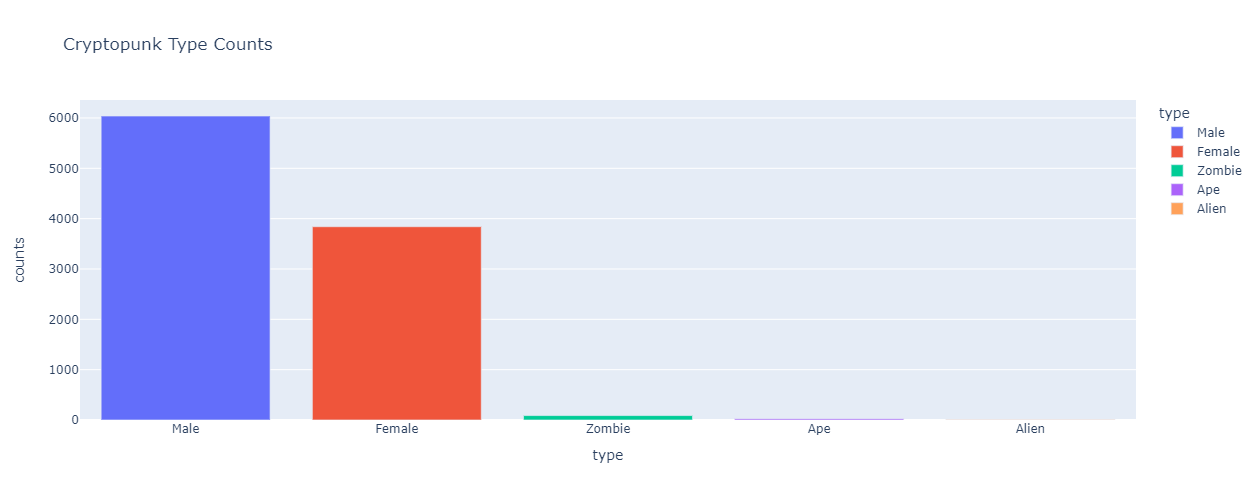

In [11]:
fig = px.bar(tx_attributes_df.drop_duplicates("punk_id")['type'].value_counts().rename_axis('type').reset_index(name='counts'),
             x="type", y="counts", color="type", title="Cryptopunk Type Counts", width = 1024, height = 500)
fig.show()

In [18]:
'''
Takes a WHILE to run.
'''
median_price = {}
i = 0
all_txns = []
punk_types = tx_attributes_df.type.unique()
dates = sorted(tx_attributes_df.date.unique())
prev_date = None
for date in tqdm(dates):
    if prev_date:
        df_up_to = tx_attributes_df[(tx_attributes_df.date <= date) & (tx_attributes_df.date > prev_date)]
    else:
        # this only occurs for the first date!
        df_up_to = tx_attributes_df[(tx_attributes_df.date <= date)]

    median_price = df_up_to[tx_attributes_df.txn_type == "Sold"].groupby("type").agg({"eth": "median"})['eth'].to_dict()
    for punk_type in punk_types:
        if punk_type not in median_price:
            # no median price/sales, so we include all transactions
            all_txns.append(df_up_to[df_up_to.type == punk_type])
        else:
            # only include transactions that are within at least 10% of the median price
            all_txns.append(df_up_to[(df_up_to.type == punk_type) & (tx_attributes_df.eth >= median_price[punk_type] * .1)])

    prev_date = date
    
tx_attributes_df = pd.concat(all_txns)

  0%|                                                                                         | 0/1471 [00:00<?, ?it/s]C:\Users\pedem\AppData\Local\Temp/ipykernel_13136/2964542480.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\pedem\AppData\Local\Temp/ipykernel_13136/2964542480.py:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

100%|██████████████████████████████████████████████████████████████████████████████| 1471/1471 [05:15<00:00,  4.66it/s]


In [19]:
tx_attributes_df = tx_attributes_df.drop_duplicates(["txn_type", "date", "eth", "punk_id", "type"])
max_sold = tx_attributes_df[tx_attributes_df.txn_type == "Sold"].eth.max()

# include all transactions with offers/bids up to 1.5x larger than largest sale
tx_attributes_df = tx_attributes_df[tx_attributes_df.eth <= max_sold * 1.5 ]

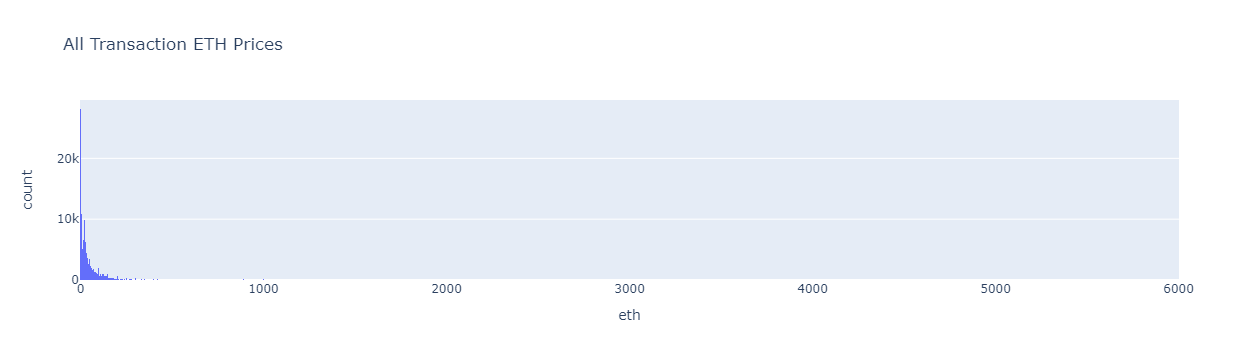

In [20]:
fig = px.histogram(tx_attributes_df, x="eth", title="All Transaction ETH Prices")
fig.show()

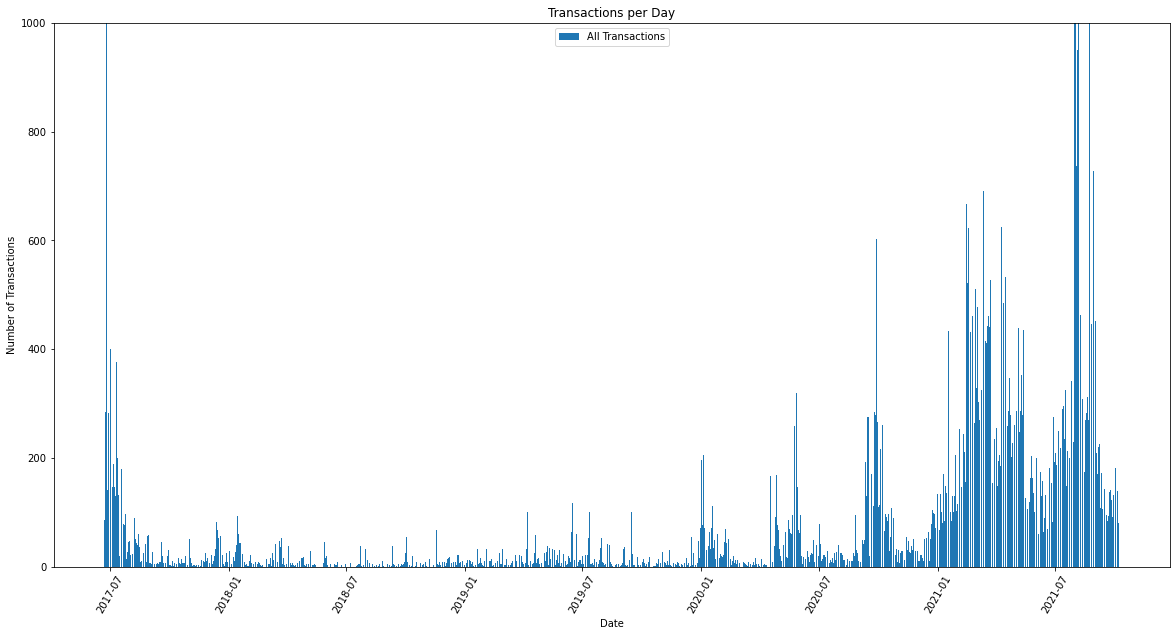

In [21]:
dates = tx_attributes_df['date'].value_counts().sort_index().rename_axis('date').reset_index(name='counts')
plt.figure(figsize=(20,10))
plt.bar(dates['date'], dates['counts'], label="All Transactions")
plt.legend()
plt.xticks(rotation=60)
plt.ylim(0, 1000)
plt.title("Transactions per Day")
plt.ylabel("Number of Transactions")
plt.xlabel("Date")
plt.show()

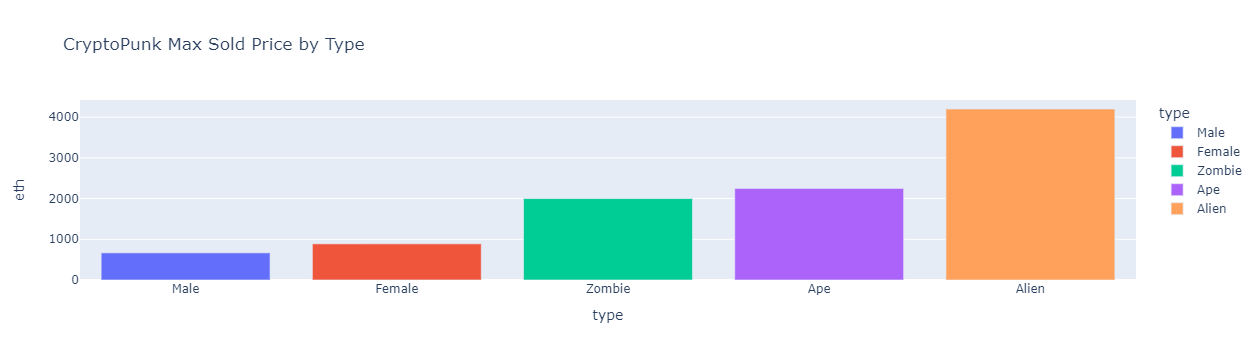

In [22]:
fig = px.bar(tx_attributes_df[tx_attributes_df.txn_type == 'Sold'].groupby("type").agg({"eth": "max"}).sort_values(by="eth").reset_index('type'),
             x="type", y="eth", color="type", title="CryptoPunk Max Sold Price by Type")
fig.show()

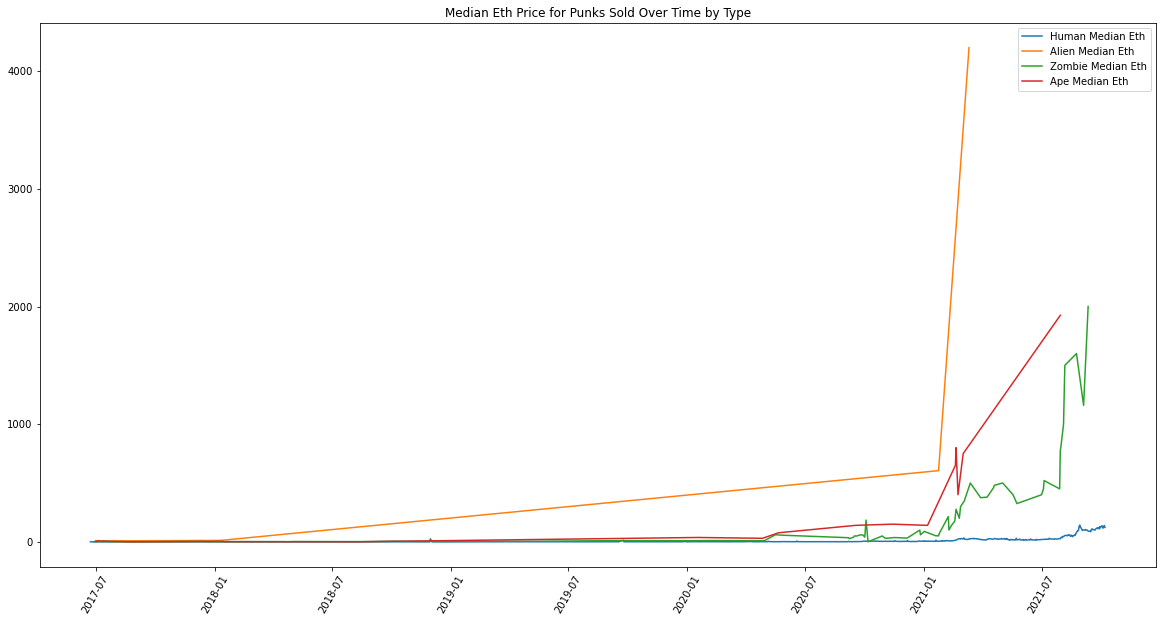

In [23]:
human = tx_attributes_df[(tx_attributes_df.txn_type == 'Sold') & ((tx_attributes_df.type == "Female") | (tx_attributes_df.type == "Male")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
alien = tx_attributes_df[(tx_attributes_df.txn_type == 'Sold') & ((tx_attributes_df.type == "Alien")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
zombie = tx_attributes_df[(tx_attributes_df.txn_type == 'Sold') & ((tx_attributes_df.type == "Zombie")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
ape = tx_attributes_df[(tx_attributes_df.txn_type == 'Sold') & ((tx_attributes_df.type == "Ape")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
plt.figure(figsize=(20,10))
plt.plot(human['date'], human['eth']['median'], label="Human Median Eth")
plt.plot(alien['date'], alien['eth']['median'], label="Alien Median Eth")
plt.plot(zombie['date'], zombie['eth']['median'], label="Zombie Median Eth")
plt.plot(ape['date'], ape['eth']['median'], label="Ape Median Eth")
plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [27]:
tx_attributes_df['num_attributes'] = tx_attributes_df.accessories.apply(lambda x: len(x))

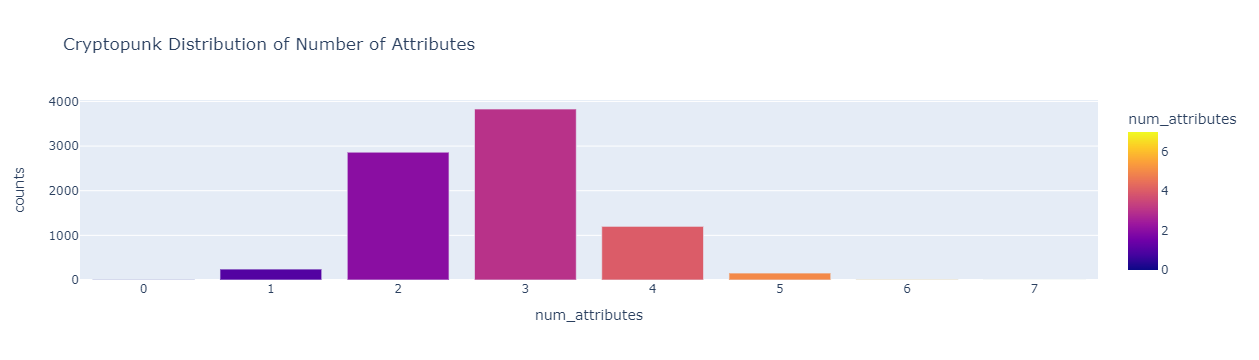

In [28]:
fig = px.bar(tx_attributes_df.drop_duplicates("punk_id")['num_attributes'].value_counts().rename_axis('num_attributes').reset_index(name='counts'),
             x="num_attributes", y="counts", color="num_attributes", title="Cryptopunk Distribution of Number of Attributes")
fig.show()

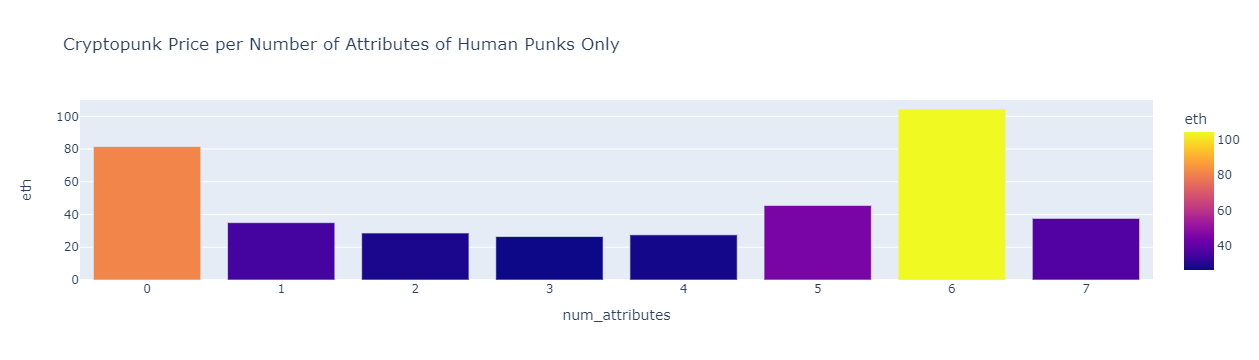

In [29]:
fig = px.bar(tx_attributes_df[(tx_attributes_df.txn_type == "Sold") & ((tx_attributes_df.type == "Female") | (tx_attributes_df.type == "Male"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", y="eth", color="eth", title="Cryptopunk Price per Number of Attributes of Human Punks Only")
fig.show()